#                   The Sparks Foundation - Data Science Intern

# Supervised Machine Learning. 



## Task 1 : Predicting the percentages of marks on the basis of the study hours. 



### Author: Shubham Kumar. 


In [339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [340]:
df= pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
df.head(11)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [341]:
df.shape


(25, 2)

In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [343]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Visualization of Data using Scatter Plot. 

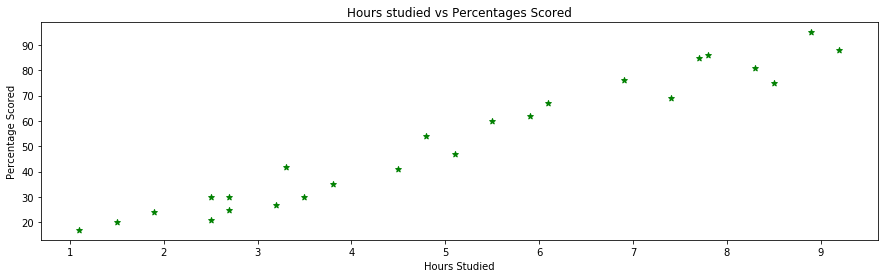

In [388]:
plt.figure(figsize=(15,4))
plt.title("Hours studied vs Percentages Scored")
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.scatter(df['Hours'],df['Scores'], c='green', marker='*')

In [346]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Preparing the Data


In [347]:
x=df.iloc[:, :-1] .values
y=df.iloc[:, -1] .values

### Spliting the Data into train and test set. 

In [348]:
#Spliting the data into training and test set. 

from sklearn.model_selection import train_test_split
x_train ,x_test ,y_train , y_test=train_test_split(x,y,test_size=0.2, random_state=0)

### Training the Model

In [349]:
from sklearn.linear_model import LinearRegression 
reg= LinearRegression()
reg.fit(x_train, y_train)
reg.coef_
print("Here: Fit refers to how well we can approximate a target function")


Here: Fit refers to how well we can approximate a target function


Text(0, 0.5, 'Scores')

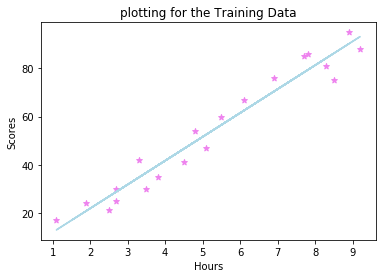

In [378]:
#Plotting the regression line. 
line=reg.coef_*x+reg.intercept_

plt.scatter(x_train, y_train, c='violet', marker='*')
plt.plot(x, line, c='lightblue');
plt.title('plotting for the Training Data')
plt.xlabel('Hours')
plt.ylabel('Scores')

Text(0, 0.5, 'Scores')

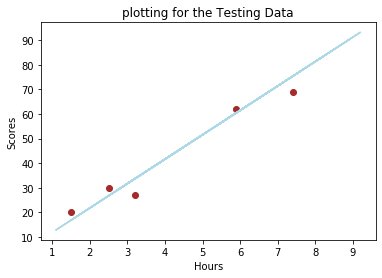

In [377]:
#Plotting for test data
line=reg.coef_*x+reg.intercept_

plt.scatter(x_test, y_test, c='brown')
plt.plot(x, line, c='lightblue');
plt.title('plotting for the Testing Data')
plt.xlabel('Hours')
plt.ylabel('Scores')

### Prediction. 

In [352]:
print(x_test)
y_pred=reg.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [389]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [354]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

# Actual Vs Prediction...

,Actual,Predicted
0,"[20, 27, 69, 30, 62]","[16.884144762398037, 33.73226077948984, 75.357..."


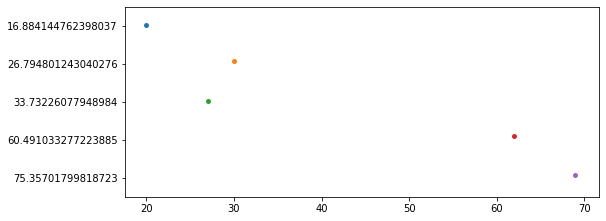

In [384]:
pred= pd.DataFrame({'Actual': [y_test], 'Predicted': [y_pred]})

plt.subplots(figsize=(8.5, 3.5))
sns.despine(f, left=True, bottom=True)
sns.stripplot(y= y_pred, x= y_test, orient='h')
pred

## If a student studies for 9.25 hrs/day

No of hours = [[9.25]]
Predict Score=93.69173248737538


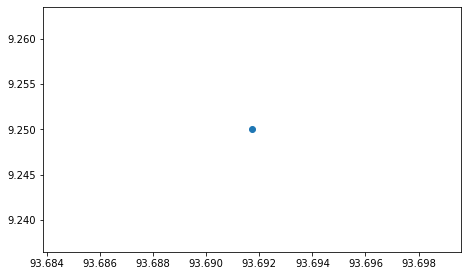

In [356]:
hours = np.array([9.25])
hours=hrs.reshape(1,-1)
pred= reg.predict(hours)
print("No of hours = {}". format(hours))
print("Predict Score={}" . format(pred[0]))
plt.subplots(figsize=(7.5, 4.5))
plt.scatter(y= hours, x= pred, )

### Evaluation of Model

In [357]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print('Mean Absolute Error:', 
metrics.mean_absolute_error(y_test, y_pred)) 
print("Mean Squared Error:", 
      mean_squared_error(y_test, y_pred))


Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174


# Thank You